In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2021_sep_week2_dpleo_20200102_run008g_nlat1f.ipynb
2021_sep_week2_dpleo_20200102_run008g_nlat1f_1.jpg
2021_sep_week2_dpleo_20200102_run008g_nlat1f_2.jpg
58869.7512330.0000560.03635000.002208012dpleo_20200102_run008g.dat
data_dpleo_20200102_run008g.txt
dpleo_20150318_run031kg5_levmarq.mod
dpleo_20200102_run008g.dat
dpleo_20200102_run008g.mod
dpleo_20200102_run008g.mod.save
dpleo_20200102_run008g.out
dpleo_20200102_run008g_demo.mod
dpleo_20200102_run008g_fixed.mod
dpleo_20200102_run008g_fixed_levmarq.mod
dpleo_20200102_run008g_levmarq.mod
dpleo_20200102_run008g_nlat1f_100.out
dpleo_20200102_run008g_nlat1f_150.out
dpleo_20200102_run008g_nlat1f_200.out
dpleo_20200102_run008g_nlat1f_250.out
dpleo_20200102_run008g_nlat1f_300.out
dpleo_20200102_run008g_nlat1f_350.out
dpleo_20200102_run008g_nlat1f_400.out
dpleo_20200102_run008g_nlat1f_450.out
dpleo_20200102_run008g_nlat1f_500.out
dpleo_20200102_run008g_rev.mod
dpleo_20200102_run008g_simplex.mod
dpleo_20200121g.mod
dpleo_20200122_run030r_levmar

In [3]:
lcurve_dpleo_data = open("dpleo_20200102_run008g.dat",'r').readlines()
N_lcurve_dpleo_data = len(lcurve_dpleo_data)

dat_BJD_time = []
dat_BJD_time_err = []
dat_Flux = []
dat_Flux_err = []

for line in open("dpleo_20200102_run008g.dat"):
    li=line.strip()
    if not li.startswith("#"):
        dat_BJD_time.append(float(li.split(" ")[0]))
        dat_BJD_time_err.append(float(li.split(" ")[1]))
        dat_Flux.append(float(li.split(" ")[2]))
        dat_Flux_err.append(float(li.split(" ")[3]))

data_result = []
for i in range (len(lcurve_dpleo_data)):
#    print ('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(dat_BJD_time[i],dat_BJD_time_err[i],dat_Flux[i],dat_Flux_err[i]))
    data_result.append('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(dat_BJD_time[i],dat_BJD_time_err[i],dat_Flux[i],dat_Flux_err[i]))
    
dat = data_result
f = open('data_dpleo_20200102_run008g.txt', 'w')
#for upper_result in upper_result:
for i in range(len(dat)):
    f.write(str(dat[i])+ '\n')
f.close()

In [4]:
lcurve_dpleo_output = open("dpleo_20200102_run008g_nlat1f_100.out",'r').readlines()
N_lcurve_dpleo_output = len(lcurve_dpleo_output)

out_BJD_time = []
out_BJD_time_err = []
out_Flux = []
out_Flux_err = []

for line in open("dpleo_20200102_run008g_nlat1f_100.out"):
    li=line.strip()
    if not li.startswith("#"):
        out_BJD_time.append(float(li.split(" ")[0]))
        out_BJD_time_err.append(float(li.split(" ")[1]))
        out_Flux.append(float(li.split(" ")[2]))
        out_Flux_err.append(float(li.split(" ")[3]))
        
output_result = []
Res = []
residual_result = []
Chi_sqr_a = [i for i in range(len(lcurve_dpleo_data))]

for i in range (len(lcurve_dpleo_data)):
#    print ('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(out_BJD_time[i],out_BJD_time_err[i],out_Flux[i],out_Flux_err[i]))
    output_result.append('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(out_BJD_time[i],out_BJD_time_err[i],out_Flux[i],out_Flux_err[i]))
    Res = dat_Flux[i] - out_Flux[i]
    residual_result.append('%0.6f' %(Res))
    Chi_sqr = (dat_Flux[i] - out_Flux[i])**2/out_Flux[i]
    Chi_sqr_a[i] = Chi_sqr
    chisq_nlat1f_100 = sum(Chi_sqr_a)
#    print ('%0.6f' %(Res))
#    print ('%0.6f' %(Chi_sqr))
#print ('%0.2f' %(chisq))
out = output_result
f = open('output_dpleo_20200102_run008g_nlat1f_100.txt', 'w')
#for upper_result in upper_result:
for i in range(len(out)):
    f.write(str(out[i])+ '\n')
f.close()

res = residual_result
f = open('residual_dpleo_20200102_run008g_nlat1f_100.txt', 'w')
#for upper_result in upper_result:
for i in range(len(res)):
    f.write(str(res[i])+ '\n')
f.close()

In [5]:
InputFile_1 = "data_dpleo_20200102_run008g.txt"
Data_1   = np.genfromtxt(InputFile_1)

InputFile_2 = "output_dpleo_20200102_run008g_nlat1f_100.txt"
Data_2   = np.genfromtxt(InputFile_2)

InputFile_3 = "residual_dpleo_20200102_run008g_nlat1f_100.txt"
Data_3   = np.genfromtxt(InputFile_3)

#Read data
E = out_BJD_time[0]

BJD_time_1 = Data_1[:,0] - E
Flux_1 = Data_1[:,2]
Flux_err_1 = Data_1[:,3]

#Output of lroche
BJD_time_2_nlat1f_100 = Data_2[:,0] - E
Flux_2_nlat1f_100 = Data_2[:,2]
Flux_err_2_nlat1f_100 = Data_2[:,3]

#Residul calculation
Res = Flux_1 - Flux_2_nlat1f_100

In [6]:
lcurve_dpleo_output = open("dpleo_20200102_run008g_nlat1f_150.out",'r').readlines()
N_lcurve_dpleo_output = len(lcurve_dpleo_output)

out_BJD_time = []
out_BJD_time_err = []
out_Flux = []
out_Flux_err = []

for line in open("dpleo_20200102_run008g_nlat1f_150.out"):
    li=line.strip()
    if not li.startswith("#"):
        out_BJD_time.append(float(li.split(" ")[0]))
        out_BJD_time_err.append(float(li.split(" ")[1]))
        out_Flux.append(float(li.split(" ")[2]))
        out_Flux_err.append(float(li.split(" ")[3]))
        
output_result = []
Res = []
residual_result = []
Chi_sqr_a = [i for i in range(len(lcurve_dpleo_data))]

for i in range (len(lcurve_dpleo_data)):
#    print ('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(out_BJD_time[i],out_BJD_time_err[i],out_Flux[i],out_Flux_err[i]))
    output_result.append('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(out_BJD_time[i],out_BJD_time_err[i],out_Flux[i],out_Flux_err[i]))
    Res = dat_Flux[i] - out_Flux[i]
    residual_result.append('%0.6f' %(Res))
    Chi_sqr = (dat_Flux[i] - out_Flux[i])**2/out_Flux[i]
    Chi_sqr_a[i] = Chi_sqr
    chisq_nlat1f_150 = sum(Chi_sqr_a)
#    print ('%0.6f' %(Res))
#    print ('%0.6f' %(Chi_sqr))
#print ('%0.2f' %(chisq))
out = output_result
f = open('output_dpleo_20200102_run008g_nlat1f_150.txt', 'w')
#for upper_result in upper_result:
for i in range(len(out)):
    f.write(str(out[i])+ '\n')
f.close()

res = residual_result
f = open('residual_dpleo_20200102_run008g_nlat1f_150.txt', 'w')
#for upper_result in upper_result:
for i in range(len(res)):
    f.write(str(res[i])+ '\n')
f.close()

In [7]:
InputFile_1 = "data_dpleo_20200102_run008g.txt"
Data_1   = np.genfromtxt(InputFile_1)

InputFile_2 = "output_dpleo_20200102_run008g_nlat1f_150.txt"
Data_2   = np.genfromtxt(InputFile_2)

InputFile_3 = "residual_dpleo_20200102_run008g_nlat1f_150.txt"
Data_3   = np.genfromtxt(InputFile_3)

#Read data
E = out_BJD_time[0]

BJD_time_1 = Data_1[:,0] - E
Flux_1 = Data_1[:,2]
Flux_err_1 = Data_1[:,3]

#Output of lroche
BJD_time_2_nlat1f_150 = Data_2[:,0] - E
Flux_2_nlat1f_150 = Data_2[:,2]
Flux_err_2_nlat1f_150 = Data_2[:,3]

#Residul calculation
Res = Flux_1 - Flux_2_nlat1f_150

In [8]:
lcurve_dpleo_output = open("dpleo_20200102_run008g_nlat1f_200.out",'r').readlines()
N_lcurve_dpleo_output = len(lcurve_dpleo_output)

out_BJD_time = []
out_BJD_time_err = []
out_Flux = []
out_Flux_err = []

for line in open("dpleo_20200102_run008g_nlat1f_200.out"):
    li=line.strip()
    if not li.startswith("#"):
        out_BJD_time.append(float(li.split(" ")[0]))
        out_BJD_time_err.append(float(li.split(" ")[1]))
        out_Flux.append(float(li.split(" ")[2]))
        out_Flux_err.append(float(li.split(" ")[3]))
        
output_result = []
Res = []
residual_result = []
Chi_sqr_a = [i for i in range(len(lcurve_dpleo_data))]

for i in range (len(lcurve_dpleo_data)):
#    print ('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(out_BJD_time[i],out_BJD_time_err[i],out_Flux[i],out_Flux_err[i]))
    output_result.append('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(out_BJD_time[i],out_BJD_time_err[i],out_Flux[i],out_Flux_err[i]))
    Res = dat_Flux[i] - out_Flux[i]
    residual_result.append('%0.6f' %(Res))
    Chi_sqr = (dat_Flux[i] - out_Flux[i])**2/out_Flux[i]
    Chi_sqr_a[i] = Chi_sqr
    chisq_nlat1f_200 = sum(Chi_sqr_a)
#    print ('%0.6f' %(Res))
#    print ('%0.6f' %(Chi_sqr))
#print ('%0.2f' %(chisq))
out = output_result
f = open('output_dpleo_20200102_run008g_nlat1f_200.txt', 'w')
#for upper_result in upper_result:
for i in range(len(out)):
    f.write(str(out[i])+ '\n')
f.close()

res = residual_result
f = open('residual_dpleo_20200102_run008g_nlat1f_200.txt', 'w')
#for upper_result in upper_result:
for i in range(len(res)):
    f.write(str(res[i])+ '\n')
f.close()

In [9]:
InputFile_1 = "data_dpleo_20200102_run008g.txt"
Data_1   = np.genfromtxt(InputFile_1)

InputFile_2 = "output_dpleo_20200102_run008g_nlat1f_200.txt"
Data_2   = np.genfromtxt(InputFile_2)

InputFile_3 = "residual_dpleo_20200102_run008g_nlat1f_200.txt"
Data_3   = np.genfromtxt(InputFile_3)

#Read data
E = out_BJD_time[0]

BJD_time_1 = Data_1[:,0] - E
Flux_1 = Data_1[:,2]
Flux_err_1 = Data_1[:,3]

#Output of lroche
BJD_time_2_nlat1f_200 = Data_2[:,0] - E
Flux_2_nlat1f_200 = Data_2[:,2]
Flux_err_2_nlat1f_200 = Data_2[:,3]

#Residul calculation
Res = Flux_1 - Flux_2_nlat1f_200

In [10]:
lcurve_dpleo_output = open("dpleo_20200102_run008g_nlat1f_250.out",'r').readlines()
N_lcurve_dpleo_output = len(lcurve_dpleo_output)

out_BJD_time = []
out_BJD_time_err = []
out_Flux = []
out_Flux_err = []

for line in open("dpleo_20200102_run008g_nlat1f_250.out"):
    li=line.strip()
    if not li.startswith("#"):
        out_BJD_time.append(float(li.split(" ")[0]))
        out_BJD_time_err.append(float(li.split(" ")[1]))
        out_Flux.append(float(li.split(" ")[2]))
        out_Flux_err.append(float(li.split(" ")[3]))
        
output_result = []
Res = []
residual_result = []
Chi_sqr_a = [i for i in range(len(lcurve_dpleo_data))]

for i in range (len(lcurve_dpleo_data)):
#    print ('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(out_BJD_time[i],out_BJD_time_err[i],out_Flux[i],out_Flux_err[i]))
    output_result.append('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(out_BJD_time[i],out_BJD_time_err[i],out_Flux[i],out_Flux_err[i]))
    Res = dat_Flux[i] - out_Flux[i]
    residual_result.append('%0.6f' %(Res))
    Chi_sqr = (dat_Flux[i] - out_Flux[i])**2/out_Flux[i]
    Chi_sqr_a[i] = Chi_sqr
    chisq_nlat1f_250 = sum(Chi_sqr_a)
#    print ('%0.6f' %(Res))
#    print ('%0.6f' %(Chi_sqr))
#print ('%0.2f' %(chisq))
out = output_result
f = open('output_dpleo_20200102_run008g_nlat1f_250.txt', 'w')
#for upper_result in upper_result:
for i in range(len(out)):
    f.write(str(out[i])+ '\n')
f.close()

res = residual_result
f = open('residual_dpleo_20200102_run008g_nlat1f_250.txt', 'w')
#for upper_result in upper_result:
for i in range(len(res)):
    f.write(str(res[i])+ '\n')
f.close()

In [11]:
InputFile_1 = "data_dpleo_20200102_run008g.txt"
Data_1   = np.genfromtxt(InputFile_1)

InputFile_2 = "output_dpleo_20200102_run008g_nlat1f_250.txt"
Data_2   = np.genfromtxt(InputFile_2)

InputFile_3 = "residual_dpleo_20200102_run008g_nlat1f_250.txt"
Data_3   = np.genfromtxt(InputFile_3)

#Read data
E = out_BJD_time[0]

BJD_time_1 = Data_1[:,0] - E
Flux_1 = Data_1[:,2]
Flux_err_1 = Data_1[:,3]

#Output of lroche
BJD_time_2_nlat1f_250 = Data_2[:,0] - E
Flux_2_nlat1f_250 = Data_2[:,2]
Flux_err_2_nlat1f_250 = Data_2[:,3]

#Residul calculation
Res = Flux_1 - Flux_2_nlat1f_250

In [12]:
lcurve_dpleo_output = open("dpleo_20200102_run008g_nlat1f_300.out",'r').readlines()
N_lcurve_dpleo_output = len(lcurve_dpleo_output)

out_BJD_time = []
out_BJD_time_err = []
out_Flux = []
out_Flux_err = []

for line in open("dpleo_20200102_run008g_nlat1f_300.out"):
    li=line.strip()
    if not li.startswith("#"):
        out_BJD_time.append(float(li.split(" ")[0]))
        out_BJD_time_err.append(float(li.split(" ")[1]))
        out_Flux.append(float(li.split(" ")[2]))
        out_Flux_err.append(float(li.split(" ")[3]))
        
output_result = []
Res = []
residual_result = []
Chi_sqr_a = [i for i in range(len(lcurve_dpleo_data))]

for i in range (len(lcurve_dpleo_data)):
#    print ('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(out_BJD_time[i],out_BJD_time_err[i],out_Flux[i],out_Flux_err[i]))
    output_result.append('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(out_BJD_time[i],out_BJD_time_err[i],out_Flux[i],out_Flux_err[i]))
    Res = dat_Flux[i] - out_Flux[i]
    residual_result.append('%0.6f' %(Res))
    Chi_sqr = (dat_Flux[i] - out_Flux[i])**2/out_Flux[i]
    Chi_sqr_a[i] = Chi_sqr
    chisq_nlat1f_300 = sum(Chi_sqr_a)
#    print ('%0.6f' %(Res))
#    print ('%0.6f' %(Chi_sqr))
#print ('%0.2f' %(chisq))
out = output_result
f = open('output_dpleo_20200102_run008g_nlat1f_300.txt', 'w')
#for upper_result in upper_result:
for i in range(len(out)):
    f.write(str(out[i])+ '\n')
f.close()

res = residual_result
f = open('residual_dpleo_20200102_run008g_nlat1f_300.txt', 'w')
#for upper_result in upper_result:
for i in range(len(res)):
    f.write(str(res[i])+ '\n')
f.close()

In [13]:
InputFile_1 = "data_dpleo_20200102_run008g.txt"
Data_1   = np.genfromtxt(InputFile_1)

InputFile_2 = "output_dpleo_20200102_run008g_nlat1f_300.txt"
Data_2   = np.genfromtxt(InputFile_2)

InputFile_3 = "residual_dpleo_20200102_run008g_nlat1f_300.txt"
Data_3   = np.genfromtxt(InputFile_3)

#Read data
E = out_BJD_time[0]

BJD_time_1 = Data_1[:,0] - E
Flux_1 = Data_1[:,2]
Flux_err_1 = Data_1[:,3]

#Output of lroche
BJD_time_2_nlat1f_300 = Data_2[:,0] - E
Flux_2_nlat1f_300 = Data_2[:,2]
Flux_err_2_nlat1f_300 = Data_2[:,3]

#Residul calculation
Res = Flux_1 - Flux_2_nlat1f_300

In [14]:
lcurve_dpleo_output = open("dpleo_20200102_run008g_nlat1f_350.out",'r').readlines()
N_lcurve_dpleo_output = len(lcurve_dpleo_output)

out_BJD_time = []
out_BJD_time_err = []
out_Flux = []
out_Flux_err = []

for line in open("dpleo_20200102_run008g_nlat1f_350.out"):
    li=line.strip()
    if not li.startswith("#"):
        out_BJD_time.append(float(li.split(" ")[0]))
        out_BJD_time_err.append(float(li.split(" ")[1]))
        out_Flux.append(float(li.split(" ")[2]))
        out_Flux_err.append(float(li.split(" ")[3]))
        
output_result = []
Res = []
residual_result = []
Chi_sqr_a = [i for i in range(len(lcurve_dpleo_data))]

for i in range (len(lcurve_dpleo_data)):
#    print ('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(out_BJD_time[i],out_BJD_time_err[i],out_Flux[i],out_Flux_err[i]))
    output_result.append('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(out_BJD_time[i],out_BJD_time_err[i],out_Flux[i],out_Flux_err[i]))
    Res = dat_Flux[i] - out_Flux[i]
    residual_result.append('%0.6f' %(Res))
    Chi_sqr = (dat_Flux[i] - out_Flux[i])**2/out_Flux[i]
    Chi_sqr_a[i] = Chi_sqr
    chisq_nlat1f_350 = sum(Chi_sqr_a)
#    print ('%0.6f' %(Res))
#    print ('%0.6f' %(Chi_sqr))
#print ('%0.2f' %(chisq))
out = output_result
f = open('output_dpleo_20200102_run008g_nlat1f_350.txt', 'w')
#for upper_result in upper_result:
for i in range(len(out)):
    f.write(str(out[i])+ '\n')
f.close()

res = residual_result
f = open('residual_dpleo_20200102_run008g_nlat1f_350.txt', 'w')
#for upper_result in upper_result:
for i in range(len(res)):
    f.write(str(res[i])+ '\n')
f.close()

In [15]:
InputFile_1 = "data_dpleo_20200102_run008g.txt"
Data_1   = np.genfromtxt(InputFile_1)

InputFile_2 = "output_dpleo_20200102_run008g_nlat1f_350.txt"
Data_2   = np.genfromtxt(InputFile_2)

InputFile_3 = "residual_dpleo_20200102_run008g_nlat1f_350.txt"
Data_3   = np.genfromtxt(InputFile_3)

#Read data
E = out_BJD_time[0]

BJD_time_1 = Data_1[:,0] - E
Flux_1 = Data_1[:,2]
Flux_err_1 = Data_1[:,3]

#Output of lroche
BJD_time_2_nlat1f_350 = Data_2[:,0] - E
Flux_2_nlat1f_350 = Data_2[:,2]
Flux_err_2_nlat1f_350 = Data_2[:,3]

#Residul calculation
Res = Flux_1 - Flux_2_nlat1f_350

In [16]:
lcurve_dpleo_output = open("dpleo_20200102_run008g_nlat1f_400.out",'r').readlines()
N_lcurve_dpleo_output = len(lcurve_dpleo_output)

out_BJD_time = []
out_BJD_time_err = []
out_Flux = []
out_Flux_err = []

for line in open("dpleo_20200102_run008g_nlat1f_400.out"):
    li=line.strip()
    if not li.startswith("#"):
        out_BJD_time.append(float(li.split(" ")[0]))
        out_BJD_time_err.append(float(li.split(" ")[1]))
        out_Flux.append(float(li.split(" ")[2]))
        out_Flux_err.append(float(li.split(" ")[3]))
        
output_result = []
Res = []
residual_result = []
Chi_sqr_a = [i for i in range(len(lcurve_dpleo_data))]

for i in range (len(lcurve_dpleo_data)):
#    print ('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(out_BJD_time[i],out_BJD_time_err[i],out_Flux[i],out_Flux_err[i]))
    output_result.append('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(out_BJD_time[i],out_BJD_time_err[i],out_Flux[i],out_Flux_err[i]))
    Res = dat_Flux[i] - out_Flux[i]
    residual_result.append('%0.6f' %(Res))
    Chi_sqr = (dat_Flux[i] - out_Flux[i])**2/out_Flux[i]
    Chi_sqr_a[i] = Chi_sqr
    chisq_nlat1f_400 = sum(Chi_sqr_a)
#    print ('%0.6f' %(Res))
#    print ('%0.6f' %(Chi_sqr))
#print ('%0.2f' %(chisq))
out = output_result
f = open('output_dpleo_20200102_run008g_nlat1f_400.txt', 'w')
#for upper_result in upper_result:
for i in range(len(out)):
    f.write(str(out[i])+ '\n')
f.close()

res = residual_result
f = open('residual_dpleo_20200102_run008g_nlat1f_400.txt', 'w')
#for upper_result in upper_result:
for i in range(len(res)):
    f.write(str(res[i])+ '\n')
f.close()

In [17]:
InputFile_1 = "data_dpleo_20200102_run008g.txt"
Data_1   = np.genfromtxt(InputFile_1)

InputFile_2 = "output_dpleo_20200102_run008g_nlat1f_400.txt"
Data_2   = np.genfromtxt(InputFile_2)

InputFile_3 = "residual_dpleo_20200102_run008g_nlat1f_400.txt"
Data_3   = np.genfromtxt(InputFile_3)

#Read data
E = out_BJD_time[0]

BJD_time_1 = Data_1[:,0] - E
Flux_1 = Data_1[:,2]
Flux_err_1 = Data_1[:,3]

#Output of lroche
BJD_time_2_nlat1f_400 = Data_2[:,0] - E
Flux_2_nlat1f_400 = Data_2[:,2]
Flux_err_2_nlat1f_400 = Data_2[:,3]

#Residul calculation
Res = Flux_1 - Flux_2_nlat1f_400

In [18]:
lcurve_dpleo_output = open("dpleo_20200102_run008g_nlat1f_450.out",'r').readlines()
N_lcurve_dpleo_output = len(lcurve_dpleo_output)

out_BJD_time = []
out_BJD_time_err = []
out_Flux = []
out_Flux_err = []

for line in open("dpleo_20200102_run008g_nlat1f_450.out"):
    li=line.strip()
    if not li.startswith("#"):
        out_BJD_time.append(float(li.split(" ")[0]))
        out_BJD_time_err.append(float(li.split(" ")[1]))
        out_Flux.append(float(li.split(" ")[2]))
        out_Flux_err.append(float(li.split(" ")[3]))
        
output_result = []
Res = []
residual_result = []
Chi_sqr_a = [i for i in range(len(lcurve_dpleo_data))]

for i in range (len(lcurve_dpleo_data)):
#    print ('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(out_BJD_time[i],out_BJD_time_err[i],out_Flux[i],out_Flux_err[i]))
    output_result.append('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(out_BJD_time[i],out_BJD_time_err[i],out_Flux[i],out_Flux_err[i]))
    Res = dat_Flux[i] - out_Flux[i]
    residual_result.append('%0.6f' %(Res))
    Chi_sqr = (dat_Flux[i] - out_Flux[i])**2/out_Flux[i]
    Chi_sqr_a[i] = Chi_sqr
    chisq_nlat1f_450 = sum(Chi_sqr_a)
#    print ('%0.6f' %(Res))
#    print ('%0.6f' %(Chi_sqr))
#print ('%0.2f' %(chisq))
out = output_result
f = open('output_dpleo_20200102_run008g_nlat1f_450.txt', 'w')
#for upper_result in upper_result:
for i in range(len(out)):
    f.write(str(out[i])+ '\n')
f.close()

res = residual_result
f = open('residual_dpleo_20200102_run008g_nlat1f_450.txt', 'w')
#for upper_result in upper_result:
for i in range(len(res)):
    f.write(str(res[i])+ '\n')
f.close()

In [19]:
InputFile_1 = "data_dpleo_20200102_run008g.txt"
Data_1   = np.genfromtxt(InputFile_1)

InputFile_2 = "output_dpleo_20200102_run008g_nlat1f_450.txt"
Data_2   = np.genfromtxt(InputFile_2)

InputFile_3 = "residual_dpleo_20200102_run008g_nlat1f_450.txt"
Data_3   = np.genfromtxt(InputFile_3)

#Read data
E = out_BJD_time[0]

BJD_time_1 = Data_1[:,0] - E
Flux_1 = Data_1[:,2]
Flux_err_1 = Data_1[:,3]

#Output of lroche
BJD_time_2_nlat1f_450 = Data_2[:,0] - E
Flux_2_nlat1f_450 = Data_2[:,2]
Flux_err_2_nlat1f_450 = Data_2[:,3]

#Residul calculation
Res = Flux_1 - Flux_2_nlat1f_450

In [20]:
lcurve_dpleo_output = open("dpleo_20200102_run008g_nlat1f_500.out",'r').readlines()
N_lcurve_dpleo_output = len(lcurve_dpleo_output)

out_BJD_time = []
out_BJD_time_err = []
out_Flux = []
out_Flux_err = []

for line in open("dpleo_20200102_run008g_nlat1f_500.out"):
    li=line.strip()
    if not li.startswith("#"):
        out_BJD_time.append(float(li.split(" ")[0]))
        out_BJD_time_err.append(float(li.split(" ")[1]))
        out_Flux.append(float(li.split(" ")[2]))
        out_Flux_err.append(float(li.split(" ")[3]))
        
output_result = []
Res = []
residual_result = []
Chi_sqr_a = [i for i in range(len(lcurve_dpleo_data))]

for i in range (len(lcurve_dpleo_data)):
#    print ('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(out_BJD_time[i],out_BJD_time_err[i],out_Flux[i],out_Flux_err[i]))
    output_result.append('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(out_BJD_time[i],out_BJD_time_err[i],out_Flux[i],out_Flux_err[i]))
    Res = dat_Flux[i] - out_Flux[i]
    residual_result.append('%0.6f' %(Res))
    Chi_sqr = (dat_Flux[i] - out_Flux[i])**2/out_Flux[i]
    Chi_sqr_a[i] = Chi_sqr
    chisq_nlat1f_500 = sum(Chi_sqr_a)
#    print ('%0.6f' %(Res))
#    print ('%0.6f' %(Chi_sqr))
#print ('%0.2f' %(chisq))
out = output_result
f = open('output_dpleo_20200102_run008g_nlat1f_500.txt', 'w')
#for upper_result in upper_result:
for i in range(len(out)):
    f.write(str(out[i])+ '\n')
f.close()

res = residual_result
f = open('residual_dpleo_20200102_run008g_nlat1f_500.txt', 'w')
#for upper_result in upper_result:
for i in range(len(res)):
    f.write(str(res[i])+ '\n')
f.close()

In [21]:
InputFile_1 = "data_dpleo_20200102_run008g.txt"
Data_1   = np.genfromtxt(InputFile_1)

InputFile_2 = "output_dpleo_20200102_run008g_nlat1f_500.txt"
Data_2   = np.genfromtxt(InputFile_2)

InputFile_3 = "residual_dpleo_20200102_run008g_nlat1f_500.txt"
Data_3   = np.genfromtxt(InputFile_3)

#Read data
E = out_BJD_time[0]

BJD_time_1 = Data_1[:,0] - E
Flux_1 = Data_1[:,2]
Flux_err_1 = Data_1[:,3]

#Output of lroche
BJD_time_2_nlat1f_500 = Data_2[:,0] - E
Flux_2_nlat1f_500 = Data_2[:,2]
Flux_err_2_nlat1f_500 = Data_2[:,3]

#Residul calculation
Res = Flux_1 - Flux_2_nlat1f_500

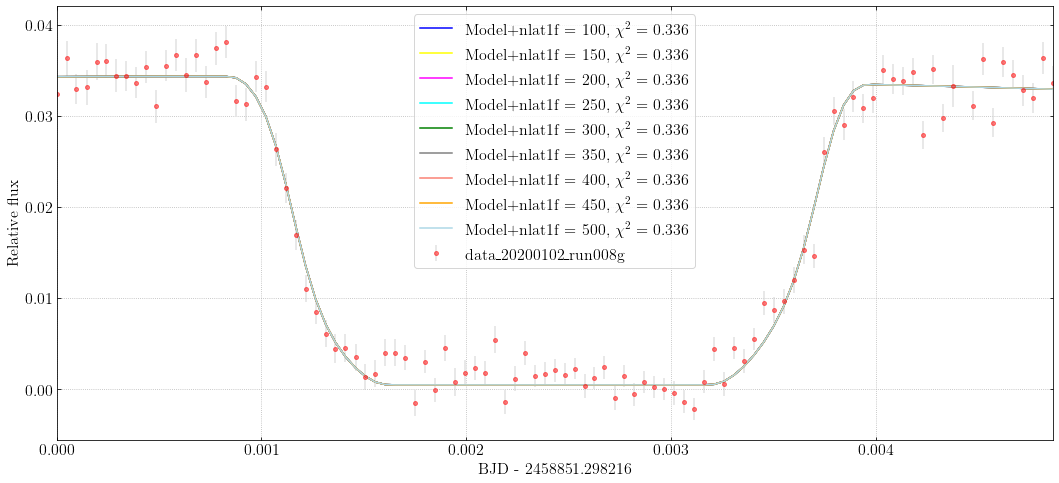

In [22]:
fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(15, 7), tight_layout=True)
plt.xlim(BJD_time_1[0], BJD_time_1[-1])
plt.xlabel('BJD - '+str(E))

plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
plt.grid(linestyle='dotted')

plt.errorbar(BJD_time_1, Flux_1, yerr=Flux_err_1, fmt='o', color='red',alpha = 0.5,ecolor='lightgray', elinewidth=2, capsize=0, markersize='4.00', label = 'data\_20200102\_run008g' )
plt.plot(BJD_time_2_nlat1f_100, Flux_2_nlat1f_100, 'blue', label='Model+nlat1f = 100, $\chi^2$ = '+str('%0.3f' %(chisq_nlat1f_100)))
plt.plot(BJD_time_2_nlat1f_150, Flux_2_nlat1f_150, 'yellow', label='Model+nlat1f = 150, $\chi^2$ = '+str('%0.3f' %(chisq_nlat1f_150)))
plt.plot(BJD_time_2_nlat1f_200, Flux_2_nlat1f_200, 'magenta', label='Model+nlat1f = 200, $\chi^2$ = '+str('%0.3f' %(chisq_nlat1f_200)))
plt.plot(BJD_time_2_nlat1f_250, Flux_2_nlat1f_250, 'cyan', label='Model+nlat1f = 250, $\chi^2$ = '+str('%0.3f' %(chisq_nlat1f_250)))
plt.plot(BJD_time_2_nlat1f_300, Flux_2_nlat1f_300, 'green', label='Model+nlat1f = 300, $\chi^2$ = '+str('%0.3f' %(chisq_nlat1f_300)))
plt.plot(BJD_time_2_nlat1f_350, Flux_2_nlat1f_350, 'grey', label='Model+nlat1f = 350, $\chi^2$ = '+str('%0.3f' %(chisq_nlat1f_350)))
plt.plot(BJD_time_2_nlat1f_400, Flux_2_nlat1f_400, 'salmon', label='Model+nlat1f = 400, $\chi^2$ = '+str('%0.3f' %(chisq_nlat1f_400)))
plt.plot(BJD_time_2_nlat1f_450, Flux_2_nlat1f_450, 'orange', label='Model+nlat1f = 450, $\chi^2$ = '+str('%0.3f' %(chisq_nlat1f_450)))
plt.plot(BJD_time_2_nlat1f_500, Flux_2_nlat1f_500, 'lightblue', label='Model+nlat1f = 500, $\chi^2$ = '+str('%0.3f' %(chisq_nlat1f_500)))
#ax0.plot(BJD_time_2_levmarq, Flux_2_levmarq, 'y-', label='levmarq\_fit, $\chi^2$ = '+str('%0.3f' %(chisq_levmarq)))
#ax0.plot(BJD_time_2_fixed_levmarq, Flux_2_fixed_levmarq, 'k-', label='fixed\_levmarq\_fit, $\chi^2$ = '+str('%0.3f' %(chisq_fixed_levmarq)))
plt.legend(loc="best")
plt.ylabel('Relative flux')

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("2021_sep_week2_dpleo_20200102_run008g_nlat1f_1.jpg", format='jpg', dpi=1200)
plt.show()

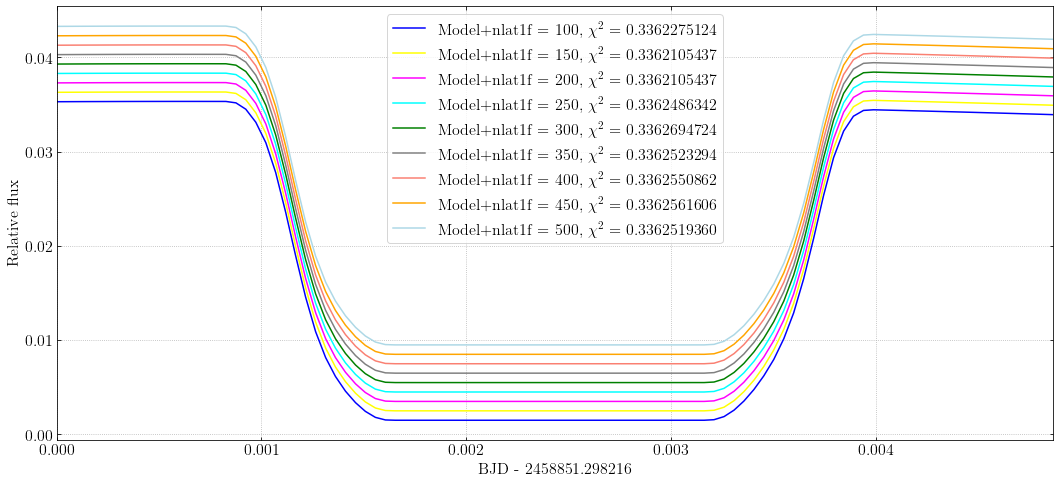

In [23]:
fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(15, 7), tight_layout=True)
plt.xlim(BJD_time_1[0], BJD_time_1[-1])
plt.xlabel('BJD - '+str(E))

plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
plt.grid(linestyle='dotted')

a = 0.001
b = 0.002
c = 0.003
d = 0.004
e = 0.005
f = 0.006
g = 0.007
h = 0.008
i = 0.009

#plt.errorbar(BJD_time_1, Flux_1, yerr=Flux_err_1, fmt='o', color='red',alpha = 0.5,ecolor='lightgray', elinewidth=2, capsize=0, markersize='4.00', label = 'data\_20200102\_run008g' )
plt.plot(BJD_time_2_nlat1f_100, Flux_2_nlat1f_100+a, 'blue', label='Model+nlat1f = 100, $\chi^2$ = '+str('%0.10f' %(chisq_nlat1f_100)))
plt.plot(BJD_time_2_nlat1f_150, Flux_2_nlat1f_150+b, 'yellow', label='Model+nlat1f = 150, $\chi^2$ = '+str('%0.10f' %(chisq_nlat1f_150)))
plt.plot(BJD_time_2_nlat1f_200, Flux_2_nlat1f_200+c, 'magenta', label='Model+nlat1f = 200, $\chi^2$ = '+str('%0.10f' %(chisq_nlat1f_200)))
plt.plot(BJD_time_2_nlat1f_250, Flux_2_nlat1f_250+d, 'cyan', label='Model+nlat1f = 250, $\chi^2$ = '+str('%0.10f' %(chisq_nlat1f_250)))
plt.plot(BJD_time_2_nlat1f_300, Flux_2_nlat1f_300+e, 'green', label='Model+nlat1f = 300, $\chi^2$ = '+str('%0.10f' %(chisq_nlat1f_300)))
plt.plot(BJD_time_2_nlat1f_350, Flux_2_nlat1f_350+f, 'grey', label='Model+nlat1f = 350, $\chi^2$ = '+str('%0.10f' %(chisq_nlat1f_350)))
plt.plot(BJD_time_2_nlat1f_400, Flux_2_nlat1f_400+g, 'salmon', label='Model+nlat1f = 400, $\chi^2$ = '+str('%0.10f' %(chisq_nlat1f_400)))
plt.plot(BJD_time_2_nlat1f_450, Flux_2_nlat1f_450+h, 'orange', label='Model+nlat1f = 450, $\chi^2$ = '+str('%0.10f' %(chisq_nlat1f_450)))
plt.plot(BJD_time_2_nlat1f_500, Flux_2_nlat1f_500+i, 'lightblue', label='Model+nlat1f = 500, $\chi^2$ = '+str('%0.10f' %(chisq_nlat1f_500)))
#ax0.plot(BJD_time_2_levmarq, Flux_2_levmarq, 'y-', label='levmarq\_fit, $\chi^2$ = '+str('%0.3f' %(chisq_levmarq)))
#ax0.plot(BJD_time_2_fixed_levmarq, Flux_2_fixed_levmarq, 'k-', label='fixed\_levmarq\_fit, $\chi^2$ = '+str('%0.3f' %(chisq_fixed_levmarq)))
plt.legend(loc="best")
plt.ylabel('Relative flux')

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("2021_sep_week2_dpleo_20200102_run008g_nlat1f_2.jpg", format='jpg', dpi=1200)
plt.show()

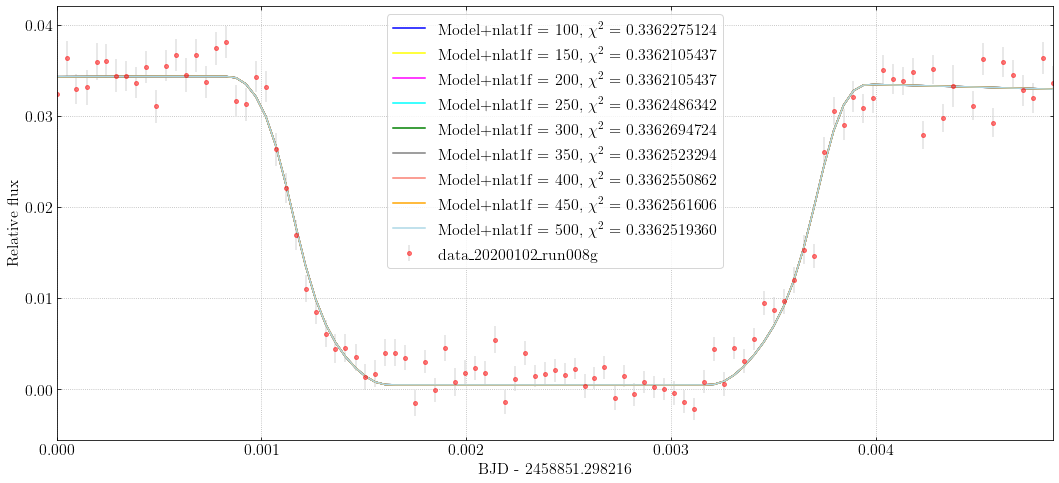

In [24]:
fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(15, 7), tight_layout=True)
plt.xlim(BJD_time_1[0], BJD_time_1[-1])
plt.xlabel('BJD - '+str(E))

plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
plt.grid(linestyle='dotted')

plt.errorbar(BJD_time_1, Flux_1, yerr=Flux_err_1, fmt='o', color='red',alpha = 0.5,ecolor='lightgray', elinewidth=2, capsize=0, markersize='4.00', label = 'data\_20200102\_run008g' )
plt.plot(BJD_time_2_nlat1f_100, Flux_2_nlat1f_100, 'blue', label='Model+nlat1f = 100, $\chi^2$ = '+str('%0.10f' %(chisq_nlat1f_100)))
plt.plot(BJD_time_2_nlat1f_150, Flux_2_nlat1f_150, 'yellow', label='Model+nlat1f = 150, $\chi^2$ = '+str('%0.10f' %(chisq_nlat1f_150)))
plt.plot(BJD_time_2_nlat1f_200, Flux_2_nlat1f_200, 'magenta', label='Model+nlat1f = 200, $\chi^2$ = '+str('%0.10f' %(chisq_nlat1f_200)))
plt.plot(BJD_time_2_nlat1f_250, Flux_2_nlat1f_250, 'cyan', label='Model+nlat1f = 250, $\chi^2$ = '+str('%0.10f' %(chisq_nlat1f_250)))
plt.plot(BJD_time_2_nlat1f_300, Flux_2_nlat1f_300, 'green', label='Model+nlat1f = 300, $\chi^2$ = '+str('%0.10f' %(chisq_nlat1f_300)))
plt.plot(BJD_time_2_nlat1f_350, Flux_2_nlat1f_350, 'grey', label='Model+nlat1f = 350, $\chi^2$ = '+str('%0.10f' %(chisq_nlat1f_350)))
plt.plot(BJD_time_2_nlat1f_400, Flux_2_nlat1f_400, 'salmon', label='Model+nlat1f = 400, $\chi^2$ = '+str('%0.10f' %(chisq_nlat1f_400)))
plt.plot(BJD_time_2_nlat1f_450, Flux_2_nlat1f_450, 'orange', label='Model+nlat1f = 450, $\chi^2$ = '+str('%0.10f' %(chisq_nlat1f_450)))
plt.plot(BJD_time_2_nlat1f_500, Flux_2_nlat1f_500, 'lightblue', label='Model+nlat1f = 500, $\chi^2$ = '+str('%0.10f' %(chisq_nlat1f_500)))
#ax0.plot(BJD_time_2_levmarq, Flux_2_levmarq, 'y-', label='levmarq\_fit, $\chi^2$ = '+str('%0.3f' %(chisq_levmarq)))
#ax0.plot(BJD_time_2_fixed_levmarq, Flux_2_fixed_levmarq, 'k-', label='fixed\_levmarq\_fit, $\chi^2$ = '+str('%0.3f' %(chisq_fixed_levmarq)))
plt.legend(loc="best")
plt.ylabel('Relative flux')

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("2021_sep_week2_dpleo_20200102_run008g_nlat1f_1.jpg", format='jpg', dpi=1200)
plt.show()